In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from numpy import *
from qutip import *
from IPython.display import Image
from numpy.linalg import *
import multiprocessing  
from multiprocessing import Pool, cpu_count
import scipy.constants as sc
import time
import datetime
import os
from matplotlib import cm
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
plt.rcParams['axes.linewidth'] = 1.5 #set the value globally
plt.rcParams['figure.dpi'] = 100

saveResults = True

In [110]:
y_list

[20.000000000000004, 40.00000000000001]

In [89]:
x_list , y_list, z_list_1 = load("Results\Simulation_Time_Domain\Results_[2024-06-18]_[07h43m].npy", allow_pickle=True)

name = "Simulation_1"

save_path_1 = "Results/" + name + "/"

time_index = datetime.datetime.now().strftime("_[%Y-%m-%d]_[%Hh%Mm]")
date_index = datetime.datetime.now().strftime("_[%Y-%m-%d]")

In [120]:
x_list_2 , y_list_2, z_list_2 = load("Results\Simulation_Time_Domain\Results_[2024-06-18]_[05h11m].npy", allow_pickle=True)

In [124]:
y_list_2

[10.000000000000002]

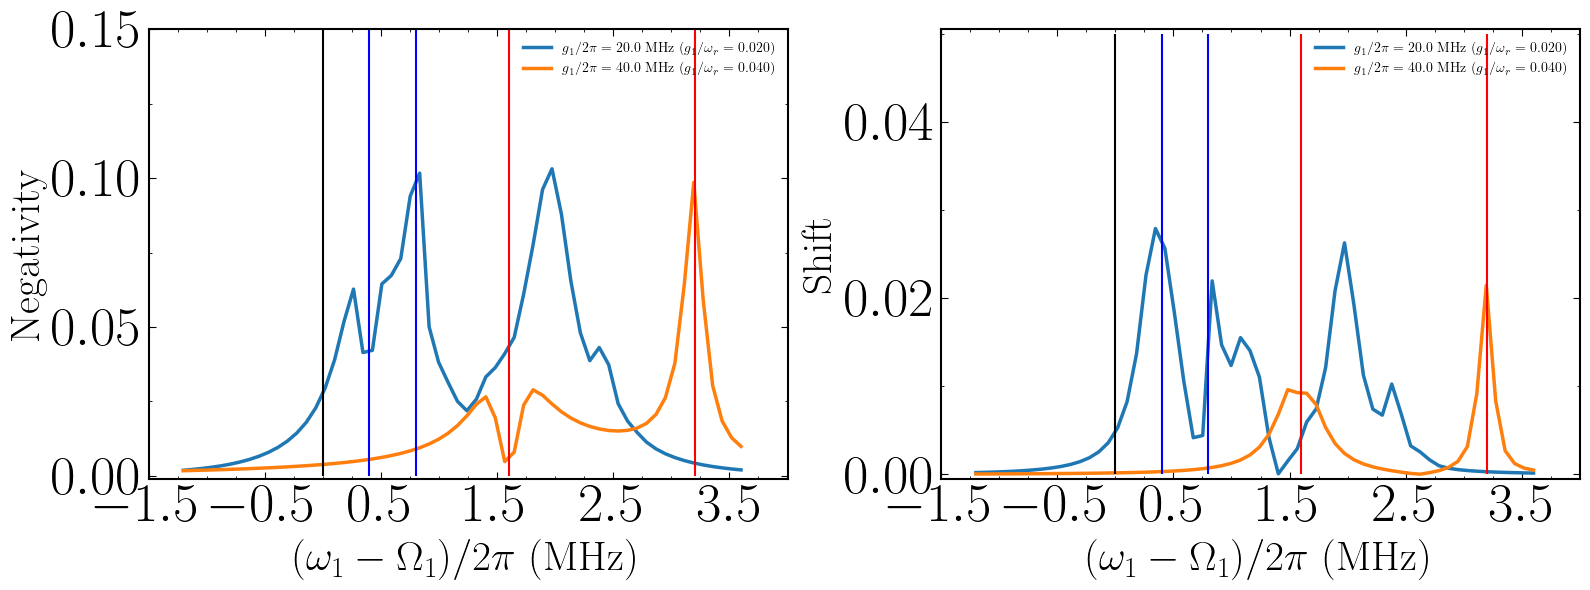

In [140]:
###############################
ls = 40.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 1000  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i in [0,1]:
    axes[0].plot(x_list, abs(z_list_1[26][i]), linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.3f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw = lw)

#axes[0].plot(x_list_2, abs(z_list_2[26][0]), linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.3f)' % (y_list_2[0],(2 * pi * 1e6 * y_list_2[0]/(wr))), lw = lw)

axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'Negativity', rotation=90, fontsize=fs)

axes[0].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[0].yaxis.set_ticks_position('both')
axes[0].legend(loc=1, fontsize=floor(fs/3), frameon=False)

axes[0].set_xlim(-1.5,4)
axes[0].set_ylim(-0.001,0.15)


eta1 = (2 * pi * 1e6 * y_list[0])**2 / wr
eta2 = (2 * pi * 1e6 * y_list[1])**2 / wr

axes[0].vlines(0,0,0.15, color='black')
axes[0].vlines(eta1/(2*pi*1e6),0,0.15, color='b')
axes[0].vlines(2*eta1/(2*pi*1e6),0,0.15, color = 'b')
axes[0].vlines(eta2/(2*pi*1e6),0,0.15, color='r')
axes[0].vlines(2*eta2/(2*pi*1e6),0,0.15, color = 'r')


start, end = axes[0].get_xlim()
axes[0].xaxis.set_ticks(arange(start, end+0.01, 1))

axes[0].xaxis.set_ticks_position('both')
axes[0].yaxis.set_ticks_position('both')

axes[0].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].margins(x=0.1, y=0.1)
###############################
for i in [0,1]:
    axes[1].plot(x_list, abs(z_list_1[24][i])/(2*pi*1e6), linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.3f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw = lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[1].set_ylabel(r'Shift', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=1, fontsize=floor(fs/3), frameon=False)

axes[1].set_xlim(-1.5,4)
#axes[1].set_ylim(-0.001,0.1)

start, end = axes[0].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+0.01, 1))

eta1 = (2 * pi * 1e6 * y_list[0])**2 / wr
eta2 = (2 * pi * 1e6 * y_list[1])**2 / wr

axes[1].vlines(0,0,0.05, color='black')
axes[1].vlines(eta1/(2*pi*1e6),0,0.05, color='b')
axes[1].vlines(2*eta1/(2*pi*1e6),0,0.05, color = 'b')
axes[1].vlines(eta2/(2*pi*1e6),0,0.05, color='r')
axes[1].vlines(2*eta2/(2*pi*1e6),0,0.05, color = 'r')

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
#axes[0].text(-7.5, 1, r"$\mathbf{a}$", color='black', fontsize=50)
#axes[1].text(-7.5, 1, r"$\mathbf{b}$", color='black', fontsize=50)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "001"
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')

plt.show()


A negatividade é máxima quando:
$$ \Delta_2 = \frac{g_a^2}{\omega_r} + \frac{g_a g_b}{\omega_r}$$

$$ \Delta_1 = \frac{g_a^2}{\omega_r}$$

In [ ]:
################################
ls = 40.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 1000  # Mechanical Frequency
###############################

for i in range(len(z_list_1[18]])): 
z_list = [eta1 * i**2 + eta1 * i * j + k for i in z_list_1[18]] for j in z_list_1[20]] for k in z_list_1[24]]]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i in [0,1]:
    axes[0].plot(x_list, abs(z_list_1[26][i]), linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.3f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw = lw)

#axes[0].plot(x_list_2, abs(z_list_2[26][0]), linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.3f)' % (y_list_2[0],(2 * pi * 1e6 * y_list_2[0]/(wr))), lw = lw)

axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'Negativity', rotation=90, fontsize=fs)

axes[0].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[0].yaxis.set_ticks_position('both')
axes[0].legend(loc=1, fontsize=floor(fs/3), frameon=False)

axes[0].set_xlim(-1.5,4)
axes[0].set_ylim(-0.001,0.15)


eta1 = (2 * pi * 1e6 * y_list[0])**2 / wr
eta2 = (2 * pi * 1e6 * y_list[1])**2 / wr

axes[0].vlines(0,0,0.15, color='black')
axes[0].vlines(eta1/(2*pi*1e6),0,0.15, color='b')
axes[0].vlines(2*eta1/(2*pi*1e6),0,0.15, color = 'b')
axes[0].vlines(eta2/(2*pi*1e6),0,0.15, color='r')
axes[0].vlines(2*eta2/(2*pi*1e6),0,0.15, color = 'r')


start, end = axes[0].get_xlim()
axes[0].xaxis.set_ticks(arange(start, end+0.01, 1))

axes[0].xaxis.set_ticks_position('both')
axes[0].yaxis.set_ticks_position('both')

axes[0].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].margins(x=0.1, y=0.1)
###############################
for i in [0,1]:
    axes[1].plot(x_list, abs(z_list_1[24][i])/(2*pi*1e6), linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.3f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw = lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[1].set_ylabel(r'Shift', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=1, fontsize=floor(fs/3), frameon=False)

axes[1].set_xlim(-1.5,4)
#axes[1].set_ylim(-0.001,0.1)

start, end = axes[0].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+0.01, 1))

eta1 = (2 * pi * 1e6 * y_list[0])**2 / wr
eta2 = (2 * pi * 1e6 * y_list[1])**2 / wr

axes[1].vlines(0,0,0.05, color='black')
axes[1].vlines(eta1/(2*pi*1e6),0,0.05, color='b')
axes[1].vlines(2*eta1/(2*pi*1e6),0,0.05, color = 'b')
axes[1].vlines(eta2/(2*pi*1e6),0,0.05, color='r')
axes[1].vlines(2*eta2/(2*pi*1e6),0,0.05, color = 'r')

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
#axes[0].text(-7.5, 1, r"$\mathbf{a}$", color='black', fontsize=50)
#axes[1].text(-7.5, 1, r"$\mathbf{b}$", color='black', fontsize=50)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "001"
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')

plt.show()


In [47]:
x_list_2 = []
for i in range(len(y_list)):
    ga = y_list[i]
    gb = ga
    wr = 1000
    x_list_2.append((x_list)/((ga**2/wr) + (ga*gb/wr)))
    

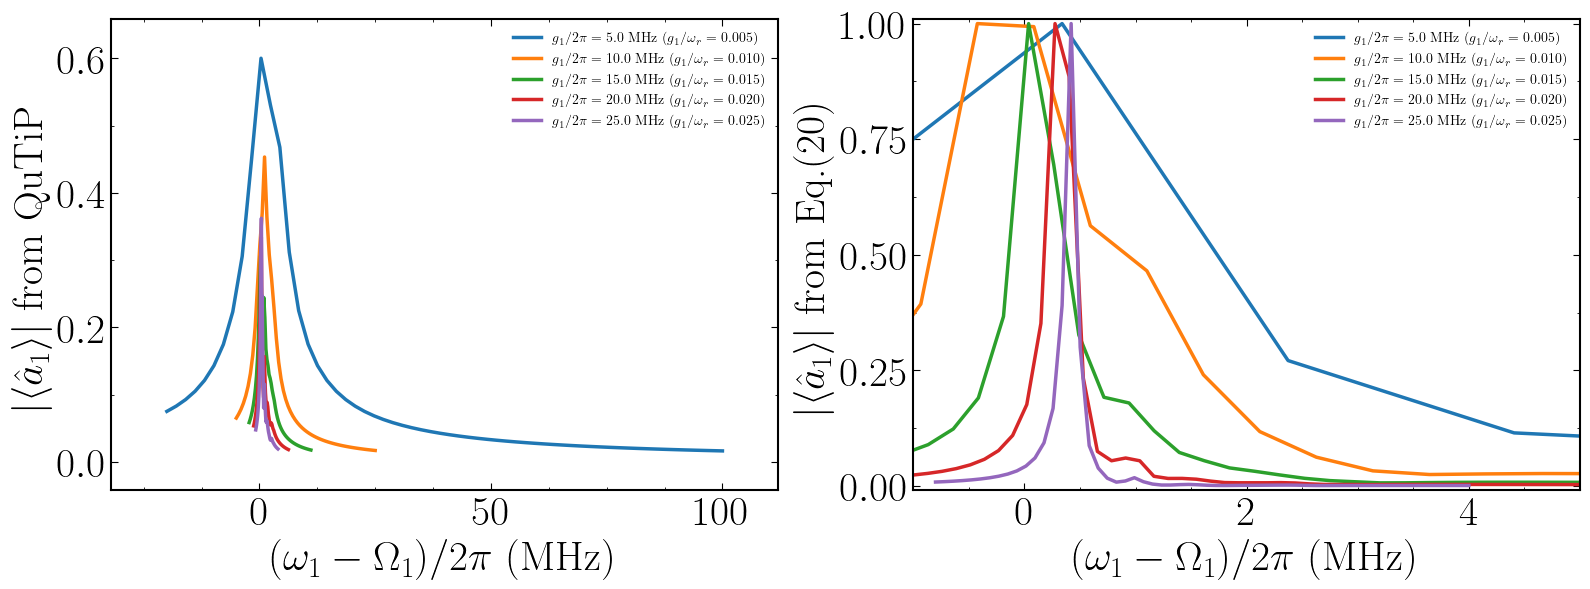

In [51]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 1000  # Mechanical Frequency
###############################


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i in [0,5,10,15,20]:
    axes[0].plot(x_list_2[i], abs(z_list_1[0][i]), linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.3f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw = lw)

axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from QuTiP', rotation=90, fontsize=fs)

axes[0].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[0].yaxis.set_ticks_position('both')
axes[0].legend(loc=1, fontsize=floor(fs/3), frameon=False)

#axes[0].set_xlim(-1,2)
#axes[0].set_ylim(-0.02,1)

#start, end = axes[0].get_xlim()
#axes[0].xaxis.set_ticks(arange(start, end+1, 1))

axes[0].xaxis.set_ticks_position('both')
axes[0].yaxis.set_ticks_position('both')

axes[0].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].margins(x=0.1, y=0.1)
###############################
for i in [0,5,10,15,20]:
    axes[1].plot(x_list_2[i], abs(z_list_1[1][i])/max(abs(z_list_1[1][i])), linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.3f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw = lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=1, fontsize=floor(fs/3), frameon=False)

axes[1].set_xlim(-1,5)
#axes[1].set_ylim(-0.02,1)

#start, end = axes[1].get_xlim()
#axes[1].xaxis.set_ticks(arange(start, end+1, 1))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
#axes[0].text(-7.5, 1, r"$\mathbf{a}$", color='black', fontsize=50)
#axes[1].text(-7.5, 1, r"$\mathbf{b}$", color='black', fontsize=50)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "001"
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')

plt.show()


In [ ]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 20  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm = mpl.colors.Normalize(0, 0.3)
im1 = axes[0].pcolormesh(x_list, y_list, z_list_1[0], cmap=cm.viridis, norm=nrm, shading='auto')
###############################
shift_n0 = [-(2 * pi * 1e6 * k**2)/(wr) for k in y_list]
shift_n1 = [(-(2 * pi * 1e6 * k**2)/(wr))-((2 * pi * 1e6 * 2*k*5)/(wr)) for k in y_list]
axes[0].plot(shift_n0, y_list, ':', color='white', lw=2)
axes[0].plot(shift_n1, y_list, ':', color='white', lw=2)
axes[0].text(-5, 4, r"$n_2 = 1$", color='white', fontsize=25)
axes[0].text(-2, 7, r"$n_2 = 0$", color='white', fontsize=25)
###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 15.1, 3))
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
###############################
axes[0].axhline(y = 0.4, color = 'C0', linestyle = '--')
axes[0].axhline(y = 3.0, color = 'C1', linestyle = '--')
axes[0].axhline(y = 6.1, color = 'C2', linestyle = '--')
axes[0].axhline(y = 9.1, color = 'C3', linestyle = '--')
###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from QuTiP', labelpad = 40, rotation=270, fontsize=fs)
###############################
colors = ['red','blue','orange','purple']
for i in [3,25,50,75]:
    axes[1].plot(x_list, z_list_1[0][i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw=lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
#axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(-0.02,1.0)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 2))
axes[1].yaxis.set_ticks(arange(0, 1.1, 0.25))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
axes[0].text(-7.5, 12.5, r"$\mathbf{a}$", color='black', fontsize=50)
axes[1].text(-7.5, 1, r"$\mathbf{b}$", color='black', fontsize=50)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "002"
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


In [ ]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 20  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm = mpl.colors.Normalize(0, 0.3)
im1 = axes[0].pcolormesh(x_list, y_list, z_list_1[1], cmap=cm.viridis, norm=nrm, shading='auto')
###############################
shift_n0 = [-(2 * pi * 1e6 * k**2)/(wr) for k in y_list]
shift_n1 = [(-(2 * pi * 1e6 * k**2)/(wr))-((2 * pi * 1e6 * 2*k*5)/(wr)) for k in y_list]
axes[0].plot(shift_n0, y_list, ':', color='white', lw=2)
axes[0].plot(shift_n1, y_list, ':', color='white', lw=2)
axes[0].text(-5, 4, r"$n_2 = 1$", color='white', fontsize=25)
axes[0].text(-2, 7, r"$n_2 = 0$", color='white', fontsize=25)
###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 12.1, 3))
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
###############################
axes[0].axhline(y = 0.4, color = 'C0', linestyle = '--')
axes[0].axhline(y = 3.0, color = 'C1', linestyle = '--')
axes[0].axhline(y = 6.1, color = 'C2', linestyle = '--')
axes[0].axhline(y = 9.1, color = 'C3', linestyle = '--')
###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', labelpad = 40, rotation=270, fontsize=fs)
###############################
for i in [3,25,50,75]:
    axes[1].plot(x_list, z_list_1[1][i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw=lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
#axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(-0.02,1.0)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 2))
axes[1].yaxis.set_ticks(arange(0, 1.1, 0.25))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
axes[0].text(-7.5, 12.5, r"$\mathbf{a}$", color='black', fontsize=50)
axes[1].text(-7.5, 1, r"$\mathbf{b}$", color='black', fontsize=50)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "003"
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


In [ ]:
rerror_list = []

for i in range(len(z_list_1[0])):
    a1 = z_list_1[0][i]
    a2 = z_list_1[1][i]

    rerror = [(abs(k1 - k2)*100)/k1 for k1,k2 in zip(a1,a2)]

    rerror_list.append(rerror)

In [ ]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 20  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm = mpl.colors.Normalize(0, 100)
im1 = axes[0].pcolormesh(x_list, y_list, rerror_list, cmap=cm.viridis, norm=nrm, shading='auto')
###############################

###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 12.1, 3))
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
###############################
axes[0].axhline(y = 0.3, color = 'C0', linestyle = '--')
axes[0].axhline(y = 3.0, color = 'C1', linestyle = '--')
axes[0].axhline(y = 6.1, color = 'C2', linestyle = '--')
axes[0].axhline(y = 9.1, color = 'C3', linestyle = '--')
###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'Relative Error (\%)', labelpad = 40, rotation=270, fontsize=fs)
###############################
for i in [3,25,50,75]:
    axes[1].plot(x_list, rerror_list[i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw=lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
#axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=2, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(-2,100)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 2))
axes[1].yaxis.set_ticks(arange(0, 101, 25))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
axes[0].text(-7.5, 12.5, r"$\mathbf{a}$", color='black', fontsize=50)
axes[1].text(-7.2, 102, r"$\mathbf{b}$", color='black', fontsize=50)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "004"
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_1 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


In [ ]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 50  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm = mpl.colors.Normalize(0, max(z_list_2[5][0]))
im1 = axes[0].pcolormesh(x_list, y_list, z_list_2[5], cmap=cm.viridis, norm=nrm, shading='auto')
###############################
shift_n0 = [-(2 * pi * 1e6 * k**2)/(wr) for k in y_list]
shift_n1 = [(-(2 * pi * 1e6 * k**2)/(wr))-((2 * pi * 1e6 * 2*k*5)/(wr)) for k in y_list]
axes[0].plot(shift_n0, y_list, ':', color='black', lw=2)
axes[0].plot(shift_n1, y_list, ':', color='black', lw=2)
axes[0].text(-4.5,7, r"$n_2 = 1$", color='black', fontsize=25)
axes[0].text(-0.5, 7, r"$n_2 = 0$", color='black', fontsize=25)
###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 12.1, 3))
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
###############################
axes[0].axhline(y = 0.4, color = 'C0', linestyle = '--')
axes[0].axhline(y = 3.0, color = 'C1', linestyle = '--')
axes[0].axhline(y = 6.1, color = 'C2', linestyle = '--')
axes[0].axhline(y = 9.1, color = 'C3', linestyle = '--')
###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'$\vert\langle \hat{a}_2\rangle\vert$', labelpad = 40, rotation=270, fontsize=fs)
###############################
for i in [3,25,50,75]:
    axes[1].plot(x_list, z_list_2[5][i], linestyle='-', label=r'$g_1/2\pi = $ %.1f MHz ($g_1/\omega_r = $ %.2f)' % (y_list[i],(2 * pi * 1e6 * y_list[i]/(wr))), lw=lw)

axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
#axes[1].set_ylabel(r'$\vert\langle \hat{a}_1\rangle\vert$ from Eq.(20)', rotation=90, fontsize=fs)

axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks_position('both')
axes[1].legend(loc=3, fontsize=floor(fs/2), frameon=False)

axes[1].set_xlim(-6,2)
axes[1].set_ylim(0, 0.4)

start, end = axes[1].get_xlim()
axes[1].xaxis.set_ticks(arange(start, end+1, 2))
axes[1].yaxis.set_ticks(arange(0, 0.41, 0.1))

axes[1].xaxis.set_ticks_position('both')
axes[1].yaxis.set_ticks_position('both')

axes[1].yaxis.set_minor_locator(AutoMinorLocator(2))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].margins(x=0.01, y=0.01)
###############################
axes[0].text(-7.5, 12.5, r"$\mathbf{a}$", color='black', fontsize=50)
axes[1].text(-7.5, 0.4, r"$\mathbf{b}$", color='black', fontsize=50)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "005"
    plt.savefig(save_path_2 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_2 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


In [ ]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 50  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

nrm1 = mpl.colors.Normalize(-40, 40)
im1 = axes[0].pcolormesh(x_list, y_list, z_list_2[10]/(2*pi*1e3), cmap=cm.bwr, norm=nrm1, shading='auto')
###############################
shift_n0 = [-(2 * pi * 1e6 * k**2)/(wr) for k in y_list]
shift_n1 = [(-(2 * pi * 1e6 * k**2)/(wr))-((2 * pi * 1e6 * 2*k*5)/(wr)) for k in y_list]
axes[0].plot(shift_n0, y_list, ':', color='black', lw=2)
axes[0].plot(shift_n1, y_list, ':', color='black', lw=2)
axes[0].text(-4.5, 7, r"$n_2 = 1$", color='black', fontsize=25)
axes[0].text(-0.5, 7, r"$n_2 = 0$", color='black', fontsize=25)
###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 12.1, 3))
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks(arange(-6, 2.1, 2))
###############################

###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'Re$(X_1)/2\pi$ (kHz)', labelpad = 40, rotation=270, fontsize=fs)
###############################

nrm2 = mpl.colors.Normalize(-40, 40)
im2 = axes[1].pcolormesh(x_list, y_list, z_list_2[12]/(2*pi*1e3), cmap=cm.bwr, norm=nrm2, shading='auto')
###############################
shift_n0 = [-(2 * pi * 1e6 * k**2)/(wr) for k in y_list]
shift_n1 = [(-(2 * pi * 1e6 * k**2)/(wr))-((2 * pi * 1e6 * 2*k*5)/(wr)) for k in y_list]
axes[1].plot(shift_n0, y_list, ':', color='black', lw=2)
axes[1].plot(shift_n1, y_list, ':', color='black', lw=2)
axes[1].text(-4.5, 7, r"$n_2 = 1$", color='black', fontsize=25)
axes[1].text(-0.5, 7, r"$n_2 = 0$", color='black', fontsize=25)
###############################
axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[1].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[1].tick_params(axis='both', which='major', direction='in', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='in', labelsize=ls)
axes[1].yaxis.set_ticks(arange(0, 12.1, 3))
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks(arange(-6, 2.1, 2))
###############################

###############################
axes[1].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].set_xlim(-6, 2)
axes[1].set_ylim(0, 12)

cbar = plt.colorbar(im2, ax=axes[1])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'Im$(X_1)/2\pi$ (kHz)', labelpad = 40, rotation=270, fontsize=fs)
###############################
axes[0].text(-7.5, 12.5, r"$\mathbf{a}$", color='black', fontsize=50)
axes[1].text(-7.5, 12.5, r"$\mathbf{b}$", color='black', fontsize=50)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "006"
    plt.savefig(save_path_2 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_2 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


In [ ]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 50  # Mechanical Frequency
###############################
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
nrm1 = mpl.colors.Normalize(0, 80)
im1 = axes[0].pcolormesh(x_list, y_list, z_list_2[8]/(2*pi*1e3), cmap=cm.viridis, norm=nrm1, shading='auto')
###############################
shift_n0 = [-(2 * pi * 1e6 * k**2)/(wr) for k in y_list]
shift_n1 = [(-(2 * pi * 1e6 * k**2)/(wr))-((2 * pi * 1e6 * 2*k*5)/(wr)) for k in y_list]
axes[0].plot(shift_n0, y_list, ':', color='white', lw=2)
axes[0].plot(shift_n1, y_list, ':', color='white', lw=2)
axes[0].text(-4.5, 7, r"$n_2 = 1$", color='white', fontsize=25)
axes[0].text(-0.5, 7, r"$n_2 = 0$", color='white', fontsize=25)

axes[0].text(-7.5, 12.5, r"$\mathbf{a}$", color='white', fontsize=50)
###############################
axes[0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0].tick_params(axis='both', which='minor', direction='out', labelsize=ls)
axes[0].yaxis.set_ticks(arange(0, 12.1, 3))
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks(arange(-6, 2.1, 2))
###############################

###############################
axes[0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[0].xaxis.set_tick_params(length=5)
axes[0].yaxis.set_tick_params(length=5)

axes[0].set_xlim(-6, 2)
axes[0].set_ylim(0, 12)

cbar = plt.colorbar(im1, ax=axes[0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'$\vert X_1\vert/2\pi$ (kHz)', labelpad = 40, rotation=270, fontsize=fs)
###############################

nrm2 = mpl.colors.Normalize(0, 0.1)
im2 = axes[1].pcolormesh(x_list, y_list, z_list_2[14], cmap=cm.viridis, norm=nrm2, shading='auto')
###############################
shift_n0 = [-(2 * pi * 1e6 * k**2)/(wr) for k in y_list]
shift_n1 = [(-(2 * pi * 1e6 * k**2)/(wr))-((2 * pi * 1e6 * 2*k*5)/(wr)) for k in y_list]
axes[1].plot(shift_n0, y_list, ':', color='white', lw=2)
axes[1].plot(shift_n1, y_list, ':', color='white', lw=2)
axes[1].text(-4.5, 7, r"$n_2 = 1$", color='white', fontsize=25)
axes[1].text(-0.5, 7, r"$n_2 = 0$", color='white', fontsize=25)
###############################
axes[1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[1].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[1].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[1].tick_params(axis='both', which='minor', direction='out', labelsize=ls)
axes[1].yaxis.set_ticks(arange(0, 12.1, 3))
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks(arange(-6, 2.1, 2))

axes[1].text(-7.5, 12.5, r"$\mathbf{b}$", color='white', fontsize=50)
###############################

###############################
axes[1].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[1].xaxis.set_minor_locator(AutoMinorLocator(4))

axes[1].xaxis.set_tick_params(length=5)
axes[1].yaxis.set_tick_params(length=5)

axes[1].set_xlim(-6, 2)
axes[1].set_ylim(0, 12)

cbar = plt.colorbar(im2, ax=axes[1])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'Negativity', labelpad = 40, rotation=270, fontsize=fs)
###############################
axes[0].text(-7.5, 12.5, r"$\mathbf{a}$", color='black', fontsize=50)
axes[1].text(-7.5, 12.5, r"$\mathbf{b}$", color='black', fontsize=50)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "007"
    plt.savefig(save_path_2 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
    plt.savefig(save_path_2 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
plt.show()


In [ ]:
###############################
ls = 30.0       # Label size
fs = 30.0       # Font size
lw = 2.5        # Line width
wr = 2 * pi * 1e6 * 50  # Mechanical Frequency
###############################
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
nrm1 = mpl.colors.Normalize(0, max(z_list_2[16][0]))
im1 = axes[0][0].pcolormesh(x_list, y_list, z_list_2[16], cmap=cm.viridis, norm=nrm1, shading='auto')
axes[0][0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0][0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0][0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0][0].tick_params(axis='both', which='minor', direction='out', labelsize=ls)
axes[0][0].yaxis.set_ticks(arange(0, 12.1, 3))
axes[0][0].yaxis.set_ticks_position('both')
axes[0][0].xaxis.set_ticks_position('both')
axes[0][0].xaxis.set_ticks(arange(-6, 2.1, 2))
axes[0][0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0][0].xaxis.set_minor_locator(AutoMinorLocator(4))
axes[0][0].xaxis.set_tick_params(length=5)
axes[0][0].yaxis.set_tick_params(length=5)
axes[0][0].set_xlim(-6, 2)
axes[0][0].set_ylim(0, 12)
cbar = plt.colorbar(im1, ax=axes[0][0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'$\langle n_1 = 1 \vert \hat{\rho}\vert 1\rangle$', labelpad = 40, rotation=270, fontsize=fs)
###############################
nrm2 = mpl.colors.Normalize(0, max(z_list_2[17][0]))
im2 = axes[0][1].pcolormesh(x_list, y_list, z_list_2[17], cmap=cm.viridis, norm=nrm2, shading='auto')
axes[0][1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[0][1].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[0][1].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[0][1].tick_params(axis='both', which='minor', direction='out', labelsize=ls)
axes[0][1].yaxis.set_ticks(arange(0, 12.1, 3))
axes[0][1].yaxis.set_ticks_position('both')
axes[0][1].xaxis.set_ticks_position('both')
axes[0][1].xaxis.set_ticks(arange(-6, 2.1, 2))
axes[0][1].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[0][1].xaxis.set_minor_locator(AutoMinorLocator(4))
axes[0][1].xaxis.set_tick_params(length=5)
axes[0][1].yaxis.set_tick_params(length=5)
axes[0][1].set_xlim(-6, 2)
axes[0][1].set_ylim(0, 12)
cbar = plt.colorbar(im2, ax=axes[0][1])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'$\langle n_1 = 2 \vert \hat{\rho}\vert 2\rangle$', labelpad = 40, rotation=270, fontsize=fs)
###############################
nrm3 = mpl.colors.Normalize(0, max(z_list_2[19][0]))
im2 = axes[1][0].pcolormesh(x_list, y_list, z_list_2[19], cmap=cm.viridis, norm=nrm3, shading='auto')
axes[1][0].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[1][0].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[1][0].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[1][0].tick_params(axis='both', which='minor', direction='out', labelsize=ls)
axes[1][0].yaxis.set_ticks(arange(0, 12.1, 3))
axes[1][0].yaxis.set_ticks_position('both')
axes[1][0].xaxis.set_ticks_position('both')
axes[1][0].xaxis.set_ticks(arange(-6, 2.1, 2))
axes[1][0].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[1][0].xaxis.set_minor_locator(AutoMinorLocator(4))
axes[1][0].xaxis.set_tick_params(length=5)
axes[1][0].yaxis.set_tick_params(length=5)
axes[1][0].set_xlim(-6, 2)
axes[1][0].set_ylim(0, 12)
cbar = plt.colorbar(im2, ax=axes[1][0])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'$\langle n_2 = 1 \vert \hat{\rho}\vert 1\rangle$', labelpad = 40, rotation=270, fontsize=fs)
###############################
nrm4 = mpl.colors.Normalize(0, max(z_list_2[20][0]))
im2 = axes[1][1].pcolormesh(x_list, y_list, z_list_2[20], cmap=cm.viridis, norm=nrm4, shading='auto')
axes[1][1].set_xlabel(r'$(\omega_1 - \Omega_1)/2\pi$ (MHz)', rotation=0, fontsize=fs)
axes[1][1].set_ylabel(r'$g_1/2\pi$ (MHz)', rotation=90, fontsize=fs)
axes[1][1].tick_params(axis='both', which='major', direction='out', labelsize=ls)
axes[1][1].tick_params(axis='both', which='minor', direction='out', labelsize=ls)
axes[1][1].yaxis.set_ticks(arange(0, 12.1, 3))
axes[1][1].yaxis.set_ticks_position('both')
axes[1][1].xaxis.set_ticks_position('both')
axes[1][1].xaxis.set_ticks(arange(-6, 2.1, 2))
axes[1][1].text(-7.5, 12.5, r"$\mathbf{b}$", color='white', fontsize=50)
axes[1][1].yaxis.set_minor_locator(AutoMinorLocator(3))
axes[1][1].xaxis.set_minor_locator(AutoMinorLocator(4))
axes[1][1].xaxis.set_tick_params(length=5)
axes[1][1].yaxis.set_tick_params(length=5)
axes[1][1].set_xlim(-6, 2)
axes[1][1].set_ylim(0, 12)
cbar = plt.colorbar(im2, ax=axes[1][1])
cbar.ax.tick_params(labelsize=ls)
cbar.ax.set_ylabel(r'$\langle n_2 = 2 \vert \hat{\rho}\vert 2\rangle$', labelpad = 40, rotation=270, fontsize=fs)
###############################
axes[0][0].text(-7.5, 12.5, r"$\mathbf{a}$", color='black', fontsize=50)
axes[0][1].text(-7.5, 12.5, r"$\mathbf{b}$", color='black', fontsize=50)
axes[1][0].text(-7.5, 12.5, r"$\mathbf{c}$", color='black', fontsize=50)
axes[1][1].text(-7.5, 12.5, r"$\mathbf{d}$", color='black', fontsize=50)
###############################
plt.tight_layout()

if(saveResults == True):
    filename = "008"
    plt.savefig(save_path_2 + "Figures/" + filename + time_index + ".pdf", bbox_inches='tight')
    plt.savefig(save_path_2 + "Figures/" + filename + time_index + ".png", bbox_inches='tight')
plt.show()


In [141]:
# Script to determine the number of max number of workers (cpu0 that the code can use
from concurrent.futures import ProcessPoolExecutor

def f(x):
    return x

if __name__ == '__main__':
    with ProcessPoolExecutor(max_workers=70) as executor:
        a = list(executor.map(f, range(70)))
        print(a)

ValueError: max_workers must be <= 61

In [15]:
N = 3

# Frequencies: wa, wb, wr
w = 2 * pi * array([4.0, 4.1, 1.0]) * 1e9
wr = w[2]

# Coupling strength: ga, gb (= ga)  
g = 2* pi * array([20,20]) * 1e6

etaA = (g[0]*g[0])/wr
etaAB = 2 * (g[0]*g[1])/wr 

# Drive frequnecies: Omega_a
Omega_a_initial = w[0] - (etaA +  2 * etaAB)
Omega_a_final = w[0] + 3 * (etaA +  2 * etaAB)

Omega_a_list = linspace(Omega_a_initial, Omega_a_final, 300)

# Drive amplitude: Ea, Eb
E_drive = 2 * pi * array([80, 80]) * 1e3


# Dissipation rates: kappa_a, kappa_b, gamma
kappa = 2 * pi * array([50, 50, 500]) * 1e3 

# Temperatures: Ta, Tb, Tr
T = array([0, 0, 0.01])

In [16]:
from Solver import Solver_TwoModesCoupledToMR_steadystate

if __name__ == '__main__':
    pool = Pool(60)
    procs = Omega_a_list
    aresults = [pool.apply_async(Solver_TwoModesCoupledToMR_steadystate, args=(N,
                                                                              w,
                                                                              g,
                                                                              E_drive,
                                                                              kappa,
                                                                              T,
                                                                              proc)) for proc in procs]
    
    pool.close()
    pool.join()
        
    results = [ar.get() for ar in aresults]


In [19]:
results[186]

Quantum object: dims = [[3, 3, 3], [3, 3, 3]], shape = (27, 27), type = oper, isherm = True
Qobj data =
[[ 9.80749611e-01+0.00000000e+00j  1.21867974e-07+5.23493168e-09j
   8.53675065e-10+3.58480743e-11j -9.89387745e-02+3.17011688e-03j
  -1.97722030e-03+6.38971438e-05j -2.79458260e-05+9.10544792e-07j
   1.37708390e-02-1.30407975e-03j  5.50595673e-04-5.22935551e-05j
   1.55556299e-05-1.48167780e-06j  2.32375064e-02+1.73440404e-04j
   4.66327222e-04+3.35188917e-06j  6.60474346e-06+4.57183509e-08j
  -1.78965833e-03+5.21878120e-05j -7.17078934e-05+2.11085413e-06j
  -2.02915951e-06+6.02845058e-08j  2.15771319e-04-1.96510324e-05j
   1.29639733e-05-1.18427853e-06j  5.49648936e-07-5.03628512e-08j
   3.47818125e-04+4.92491064e-06j  1.39655695e-05+1.93885214e-07j
   3.95812929e-07+5.38727784e-09j -2.08738601e-05+5.62198224e-07j
  -1.25593060e-06+3.41733136e-08j -5.33123485e-08+1.46521963e-09j
   2.21521331e-06-1.94158326e-07j  1.77652900e-07-1.56203093e-08j
   1.00390245e-08-8.85464914e-10j]
 [ 